In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv("NY Realstate Pricing.csv")

In [3]:
df.head()

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [4]:
df.select_dtypes(include='object').nunique()

neighbourhood    186
room_type          4
dtype: int64

In [5]:
df.shape

(17614, 12)

In [6]:
df.select_dtypes(include="object").nunique()

neighbourhood    186
room_type          4
dtype: int64

In [7]:
df.neighbourhood.unique()

array(['Midtown', 'Brooklyn', 'Manhattan', 'Bedford-Stuyvesant',
       'Lower East Side', 'Park Slope', 'Williamsburg', 'East Village',
       'Harlem', 'Hamilton Heights', 'Bushwick', 'Alphabet City',
       'Flatbush', 'Long Island City', 'Clinton Hill', 'Fort Greene',
       'Upper West Side', 'Greenpoint', 'Kips Bay', "Hell's Kitchen",
       'East Harlem', 'Queens', 'Meatpacking District',
       'Brooklyn Heights', 'Prospect Heights', 'Chelsea',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Lefferts Garden',
       'Flatlands', 'Kew Garden Hills', 'Upper East Side', 'Sunnyside',
       'DUMBO', 'Staten Island', 'Highbridge', 'Ridgewood', 'Jamaica',
       'Middle Village', 'Cobble Hill', 'Roosevelt Island', 'Soho',
       'West Brighton', 'Eastchester', 'Crown Heights',
       'Morningside Heights', 'Chinatown', 'Red Hook',
       'Kingsbridge Heights', 'The Rockaways', 'Midtown East',
       'Forest Hills', 'The Bronx', 'Washington Heights', 'Astoria',
       'Baycheste

In [9]:
# Define the conditions for each segment
manhattan = ['Midtown', 'Lower East Side', 'East Village', 'Harlem', 'Hamilton Heights', 'Alphabet City', 'Upper West Side', 'Kips Bay', "Hell's Kitchen", 'Upper East Side', 'Morningside Heights', 'Chinatown', 'Gramercy Park', 'Financial District', 'Flatiron District', 'Greenwich Village', 'Noho', 'Nolita', 'Tribeca', 'Times Square/Theatre District', 'Union Square']
brooklyn = ['Brooklyn', 'Bedford-Stuyvesant', 'Park Slope', 'Williamsburg', 'Bushwick', 'Flatbush', 'Clinton Hill', 'Fort Greene', 'Greenpoint', 'Carroll Gardens', 'Gowanus', 'Lefferts Garden', 'DUMBO', 'Brooklyn Heights', 'Prospect Heights', 'Cobble Hill', 'Red Hook', 'Bay Ridge', 'Boerum Hill', 'Borough Park', 'Canarsie', 'Columbia Street Waterfront', 'Downtown Brooklyn', 'Dyker Heights', 'Gravesend', 'Sunset Park', 'Bath Beach', 'Bergen Beach', 'Mill Basin']
queens = ['Long Island City', 'Queens', 'Sunnyside', 'Astoria', 'Forest Hills', 'Jackson Heights', 'Kew Garden Hills', 'Elmhurst', 'Fresh Meadows', 'Glendale', 'Maspeth', 'Woodhaven', 'Ozone Park', 'Rego Park', 'Woodside', 'Whitestone']
bronx = ['The Bronx', 'Highbridge', 'Kingsbridge Heights', 'Riverdale', 'The Rockaways', 'Morris Heights', 'Morris Park', 'Mott Haven', 'Concourse', 'Concourse Village', 'Country Club', 'Eastchester', 'East Tremont', 'Fordham', 'Hunts Point', 'Longwood', 'Melrose', 'Mount Eden', 'Norwood', 'Spuyten Duyvil', 'University Heights', 'Van Nest', 'Claremont', 'Bedford Park', 'Bronxdale']
staten_island = ['Staten Island', 'West Brighton', 'Rosebank', 'Stapleton', 'Great Kills', 'Mariners Harbor', 'Randall Manor']

# Define a function that returns the segment based on the neighbourhood
def segment_neighborhood(neighbourhood):
    if neighbourhood in manhattan:
        return 'Manhattan'
    elif neighbourhood in brooklyn:
        return 'Brooklyn'
    elif neighbourhood in queens:
        return 'Queens'
    elif neighbourhood in bronx:
        return 'Bronx'
    elif neighbourhood in staten_island:
        return 'Staten Island'
    else:
        return 'Other'

In [12]:
df["neighbourhood"] = df["neighbourhood"].apply(segment_neighborhood)

<AxesSubplot:>

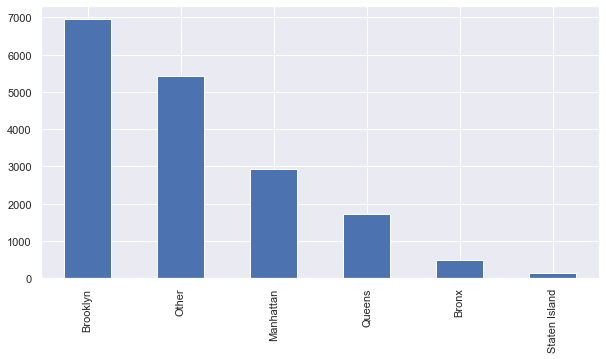

In [13]:
plt.figure(figsize=(10,5))
df["neighbourhood"].value_counts().plot(kind='bar')

In [15]:
# Drop Unnecesaary Columns
df.drop(columns=["F1","id","latitude","longitude"], inplace=True)

In [16]:
df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,Manhattan,Entire home/apt,225,15,10,48,0.39,1
1,Brooklyn,Entire home/apt,89,188,1,295,4.67,1
2,Other,Entire home/apt,200,362,3,78,0.60,19
3,Brooklyn,Private room,60,0,29,49,0.38,365
4,Other,Private room,79,141,2,454,3.52,242


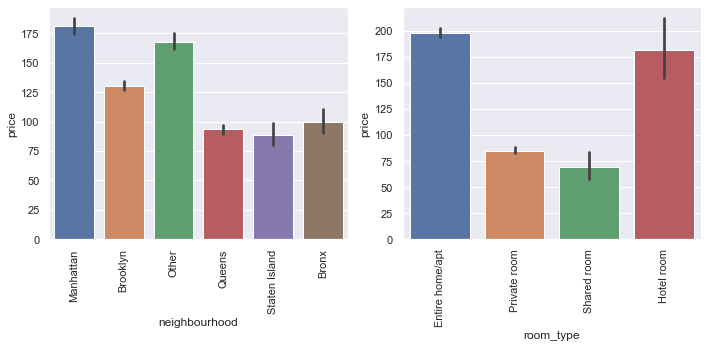

In [27]:
# Exploratory Data Analysis
cat_vars = ['neighbourhood', 'room_type']

#Create Figure with subplots
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axs = axs.flatten()

#create bar plot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price',data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
#adjust spacing between subplots
fig.tight_layout()

#Show Plot
plt.show()


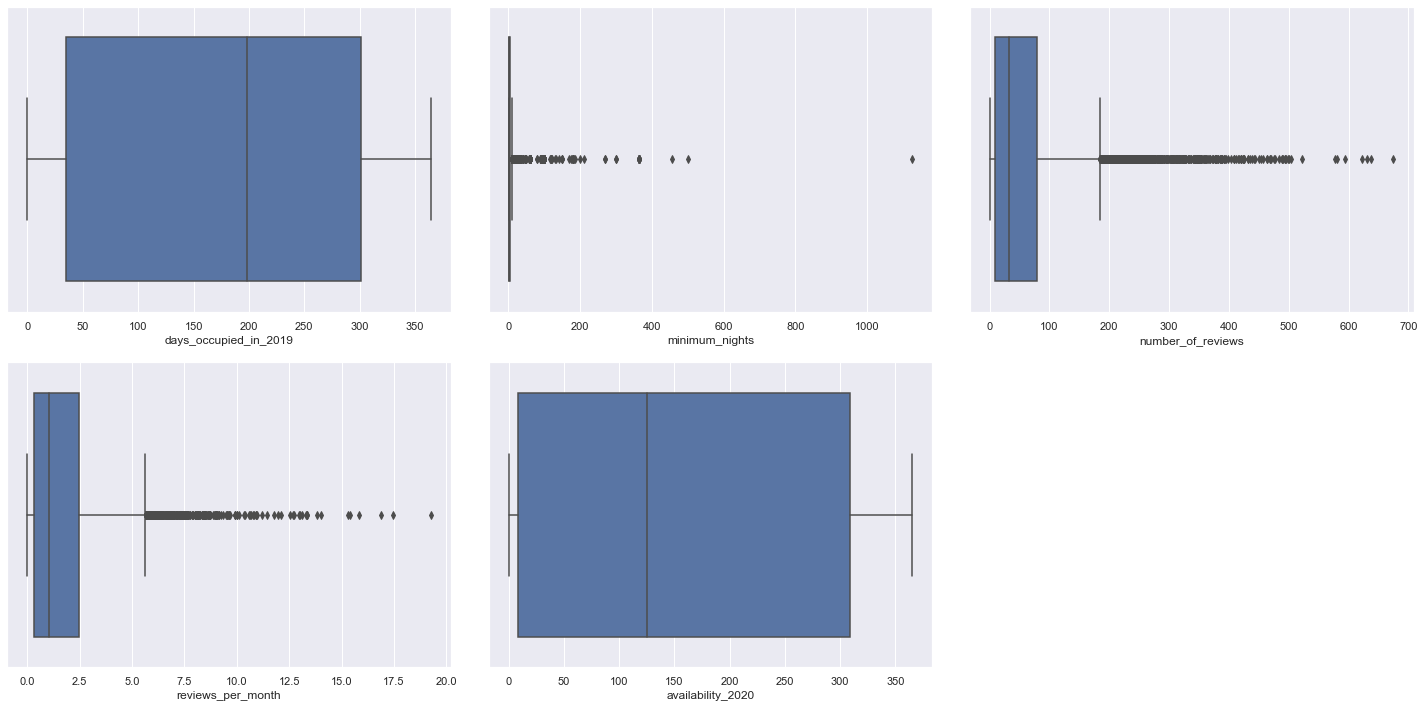

In [30]:
num_vars=["days_occupied_in_2019","minimum_nights","number_of_reviews","reviews_per_month","availability_2020"]
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

#Show the Boxplot
for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    
#Adjust spacing between subplots
fig.tight_layout()

#Remove Sixth Plot
fig.delaxes(axs[5])

#plot
plt.show()

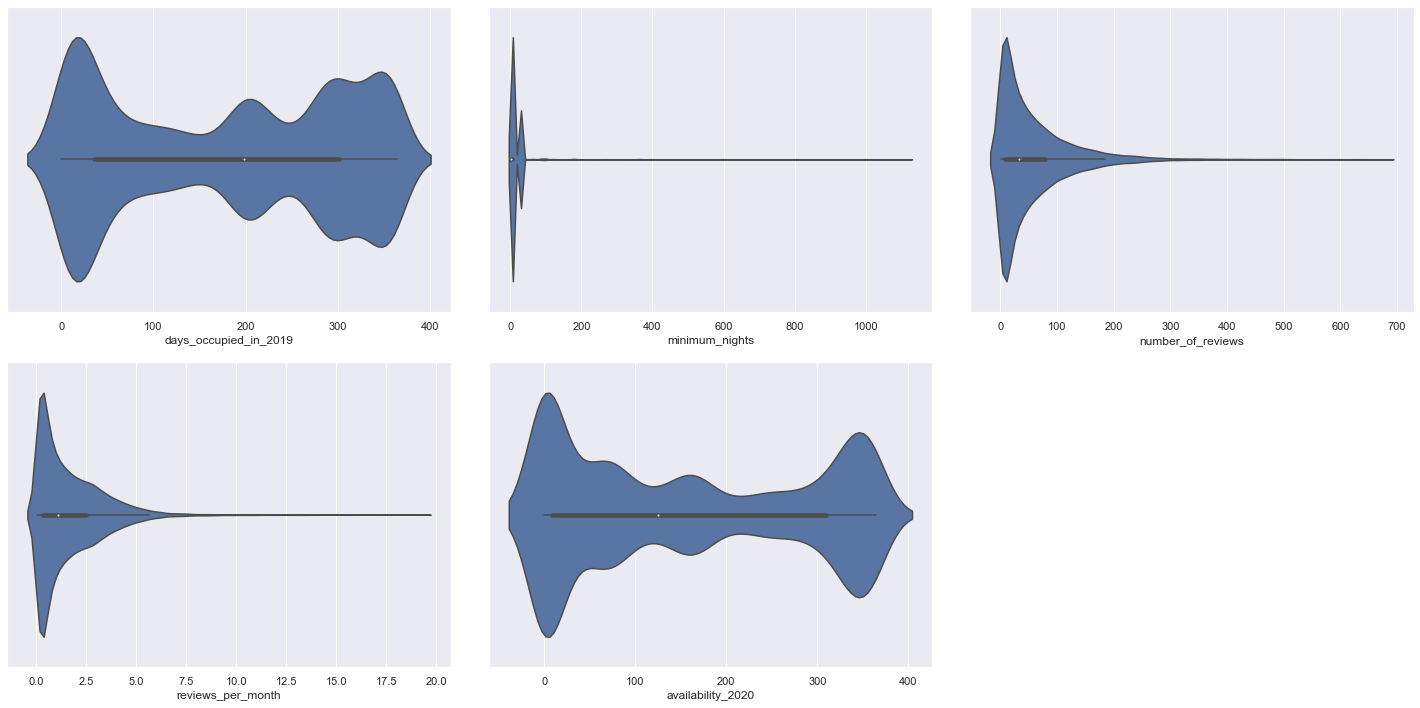

In [32]:
num_vars=["days_occupied_in_2019","minimum_nights","number_of_reviews","reviews_per_month","availability_2020"]
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate(num_vars):
    sns.violinplot(x=var,data=df,ax=axs[i])
    
fig.tight_layout()

fig.delaxes(axs[5])

plt.show()

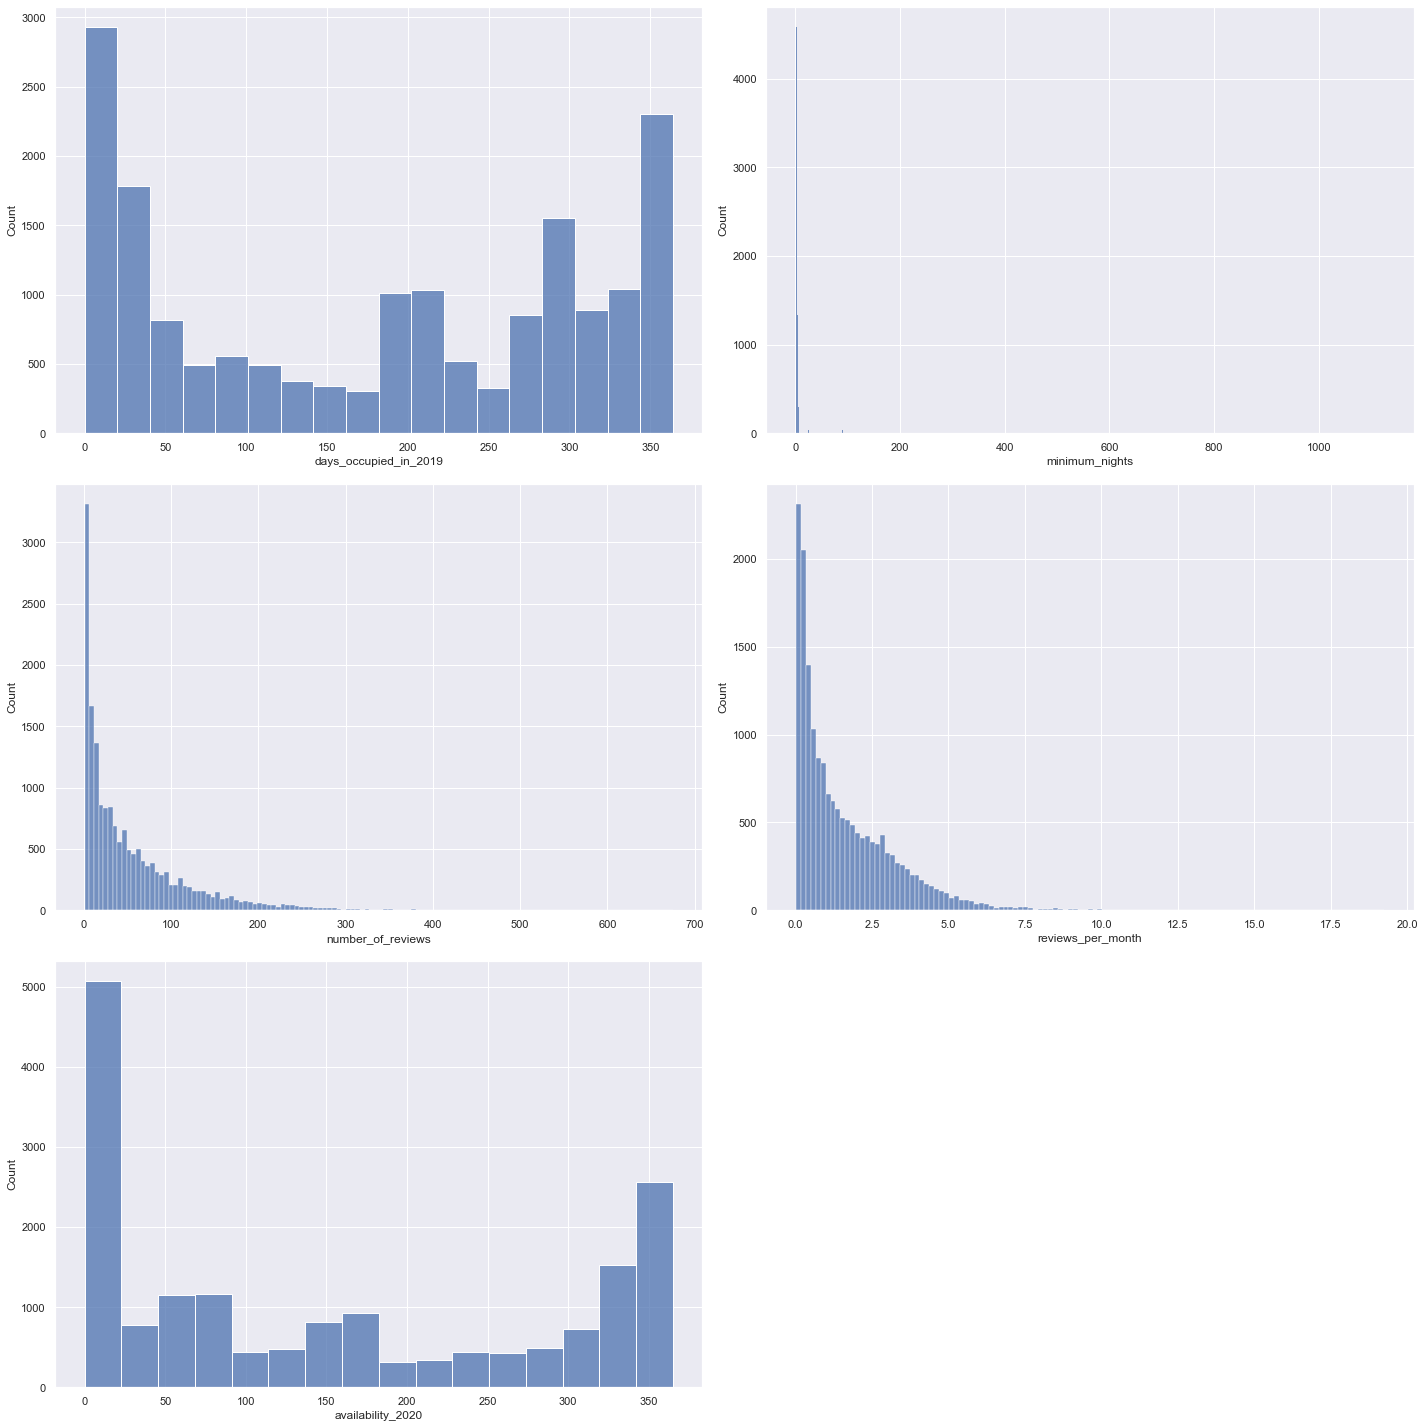

In [48]:
num_vars=["days_occupied_in_2019","minimum_nights","number_of_reviews","reviews_per_month","availability_2020"]
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
axs=axs.flatten()

for i,var in enumerate(num_vars):
    sns.histplot(x=var,data=df,ax=axs[i])
    
fig.tight_layout()

fig.delaxes(axs[5])
plt.show()



In [51]:
# Checking the Missing Values
df.isnull().sum()

neighbourhood            0
room_type                0
price                    0
days_occupied_in_2019    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2020        0
dtype: int64

In [53]:
#Label encoding for every object (string) datatypes
df.select_dtypes(include='object').columns

Index(['neighbourhood', 'room_type'], dtype='object')

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include='object').columns:
    print 